<div class="">
<br><br>
<center><br><font size="12"><font face="calibri"><strong>Kecerdasan Buatan
<center><br><font size="5"><font face="calibri"><strong>Deteksi serangan DoS/DDoS menggunakan artificial neural network
<br>
<br><strong>Ahmad Afidin
<br><strong>09011281722067


Refrensi : 
    
    Dataset : https://archive.ics.uci.edu/ml/datasets/KDD+Cup+1999+Data
    Papper  : "Using Artificial Neural Network in Intrusion Detection SystemstoComputer Networks"

# Import Modul

Modul Yang diperlukan adalah

1. `numpy dan Pandas `

Kedua modul ini sudah standar yang wajib diimport untuk menghandle data.

2. `Matplotlib`

Library ini digunakan untuk men-plot hasil akurasi dan loss nanti.
3. `sklearn`

Adapun pada library ini , fungsi yang dipakai adalah

    a. train_test_split  => Untuk men-split data menjadi training dan testing
    b. confusion_matrix  => mengukur performa model learning dalam bentuk tabel
    c. classification_report => mendapatkan hasil pengukuran CM

4. `keras`

Pada Keras , Fungsi yang dipakai adalah :
    
    - Optimizers Adam
    - Model Sequential
    - Layers Dense
    - Aktivasi Relu

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
scaler = MinMaxScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


# Import Data Set

Pada research ini menggunakan dataset kddcup99 yang sudah di preprosesing sebelumnya
dan pada dataset yang di pakai, yang digunakan hanyalah sample dari dataset yang sebenarnya

    kddcup_99_sample4.csv 
    
sumber dataset : https://archive.ics.uci.edu/ml/datasets/KDD+Cup+1999+Data

In [2]:
data = pd.read_csv ("kddcup_99_sample4.csv")
dataset = data.drop(columns=["Unnamed: 0"])

### Mengecek data kosong

In [3]:
dataset.isnull().any().sum()

0

### Dataset yang digunakan dalam penelitian
Dataset yang sebenarnya pada link di atas memiliki jumlah data sebesar 4898430 baris data

dan pada penelitian ini hanya menggunakan sample dari dataset sebenarnya yaitu sebesar 215744 baris data




Dibawah ini adalah tampilan dataset yang digunakan dalam penelitian ini

In [4]:
dataset.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,attack_cat
0,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.07,0.00,0.00,1.0,1.0,0.0,0.0,neptune,1
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.07,0.06,0.00,0.00,1.0,1.0,0.0,0.0,neptune,1
2,0,tcp,ftp_data,SF,29,0,0,0,0,0,...,0.43,0.08,0.43,0.06,0.0,0.0,0.0,0.0,normal,0
3,0,udp,private,SF,105,0,0,0,0,0,...,0.94,0.01,0.00,0.00,0.0,0.0,0.0,0.0,normal,0
4,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.06,0.00,0.00,1.0,1.0,0.0,0.0,neptune,1


## Informasi dataset

Terdapat infomasi atau isi dari dataset yang digunakan yaitu dataset berjumlah 215744 buah rangenya dari 0 sampai 215743, fitur dari dataset tersebut berjumlah 42 fitur dan memilki sati input dengan 2 kelas yaitu (0) normal dan (1) DDoS.  serta besar memory yang digunakan adalah 70.8 mb

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215744 entries, 0 to 215743
Data columns (total 43 columns):
duration                       215744 non-null int64
protocol_type                  215744 non-null object
service                        215744 non-null object
flag                           215744 non-null object
src_bytes                      215744 non-null int64
dst_bytes                      215744 non-null int64
land                           215744 non-null int64
wrong_fragment                 215744 non-null int64
urgent                         215744 non-null int64
hot                            215744 non-null int64
num_failed_logins              215744 non-null int64
logged_in                      215744 non-null int64
lnum_compromised               215744 non-null int64
lroot_shell                    215744 non-null int64
lsu_attempted                  215744 non-null int64
lnum_root                      215744 non-null int64
lnum_file_creations            215744 

## Persebaran Data dari kelas output

1    118467
0     97277
Name: attack_cat, dtype: int64

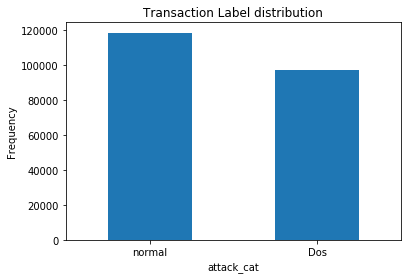

In [6]:
normal = dataset[dataset.attack_cat==0]
Dos = dataset[dataset.attack_cat==1]
labels = ['normal','Dos']
classes = pd.value_counts(data['attack_cat'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Label distribution")
plt.xticks(range(2), labels)
plt.xlabel("attack_cat")
plt.ylabel("Frequency")
dataset.attack_cat.value_counts()

# Preprosesing data

### Labelencoder
mengubah data ordinal pada dataset menjadi data numerical

In [7]:
enc = LabelEncoder()
dataset = dataset.apply(enc.fit_transform)

In [8]:
dataset.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,attack_cat
0,0,1,44,4,0,0,0,0,0,0,...,5,7,0,0,96,64,0,0,2,1
1,0,1,44,4,0,0,0,0,0,0,...,7,6,0,0,96,64,0,0,2,1
2,0,1,19,8,23,0,0,0,0,0,...,43,8,43,6,0,0,0,0,3,0
3,0,2,44,8,90,0,0,0,0,0,...,94,1,0,0,0,0,0,0,3,0
4,0,1,44,4,0,0,0,0,0,0,...,6,6,0,0,96,64,0,0,2,1


### Pemisahan antara Fitur dan Label pada dataset

    Fitur dan Label dipisah supaya mesin bisa mempelajari fitur dari label yang diberikan.
    --Fitur
    X = 42 fitur
    
    --Label
    Y = 1 kolom isinya 2 kelas ( Normal(0) atau DoS(1))

In [9]:
x= np.array(dataset.ix[:, 0:42])
y = np.array(dataset.ix[:, 42])

C:\Users\AFIDIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\AFIDIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


### MinMaxScaler
mengubah setiap fitur pada dataset dengan penskalaan setiap fitur ke rentang yang diberikan

In [10]:
scaler= MinMaxScaler()
feature_scaled=scaler.fit_transform(x)
feature_scaled.shape

(215744, 42)

## Splitt dataset

    Data fitur dan label dibagi menjadi data train dan test dengan ratio 8 : 2
    

In [11]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=2)

# Model ANN

Disini digunakan model `Sequential()`. Pada Model ini terdapat `Input layer` , `Hidden layer` dan `Output layer`. 

<strong>Penentuan Jumlah Layer ditentukan sebagai berikut </strong>:

    a. Jumlah dari input layer itu sama dengan jumlah fitur yang diberikan kepada mesin.
    b. Jumlah dari Output Layer sesuai dengan kolom yang diberikan kepada mesin.
  
  
<strong>Jumlah layer yang ditentukan adalah </strong>:

    1. Input layer          -> Layer pertama terbentuk dari 42 layer Neural sesuai fitur dengan menggunakan activation                                    relu.
    2. Hidden Layer pertama -> 100 units Neural Network dengan menggunakan activation relu.
    3. Output layer         -> 1 unit Neural Network dengan menggunakan activation sigmoid.

In [12]:
model = Sequential()
model.add(Dense(units= 100, input_dim =42 , activation='relu'))
model.add(Dense(units= 100, activation='relu'))
model.add(Dense(units= 1, activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               4300      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 14,501
Trainable params: 14,501
Non-trainable params: 0
_________________________________________________________________


# Compile Model

Model Dicompile dengan Optimizer adam dengan fungsi loss Binary Crossentropy.

In [14]:
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## Testing dan validasi model

untuk training variabel x_train, y_train dan untuk validasi variabel x_test dan y_test

Adapun parameter yang bisa di tuning yaitu :

1. `batch_size` => 32
2. `epochs`  => 50

In [15]:
acc_training = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, 
                         epochs=50)


Train on 172595 samples, validate on 43149 samples
Epoch 1/50
172595/172595 [==============================] - 16s 91us/step - loss: 0.0593 - accuracy: 0.9952 - val_loss: 0.0106 - val_accuracy: 0.9988
Epoch 2/50
172595/172595 [==============================] - 15s 89us/step - loss: 0.0117 - accuracy: 0.9987 - val_loss: 0.0111 - val_accuracy: 0.9987
Epoch 3/50
172595/172595 [==============================] - 15s 89us/step - loss: 0.0145 - accuracy: 0.9988 - val_loss: 0.0022 - val_accuracy: 0.9994
Epoch 4/50
172595/172595 [==============================] - 15s 88us/step - loss: 0.0092 - accuracy: 0.9992 - val_loss: 0.0025 - val_accuracy: 0.9997
Epoch 5/50
172595/172595 [==============================] - 15s 87us/step - loss: 0.0080 - accuracy: 0.9993 - val_loss: 0.0076 - val_accuracy: 0.9993
Epoch 6/50
172595/172595 [==============================] - 16s 90us/step - loss: 0.0073 - accuracy: 0.9994 - val_loss: 0.0262 - val_accuracy: 0.9962
Epoch 7/50
172595/172595 [======================

## Prediksi Model

In [16]:
acc_testing  = model.evaluate(x_test, y_test) 
print("Akurasi data Testing = %.2f%%" % (acc_testing[1]*100))

43149/43149 [==============================] - 1s 27us/step
Akurasi data Testing = 99.99%


# Plot hasil akurasi training dan akurasi testing

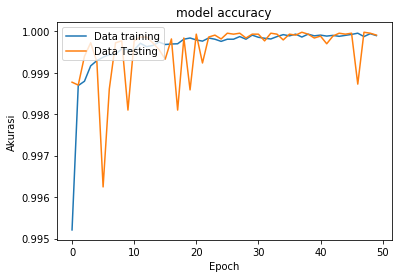

In [17]:
plt.plot(acc_training.history['accuracy'])
plt.plot(acc_training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Data training', 'Data Testing'], loc='upper left')
plt.show()

# Plot hasil Loss antara training dan testing

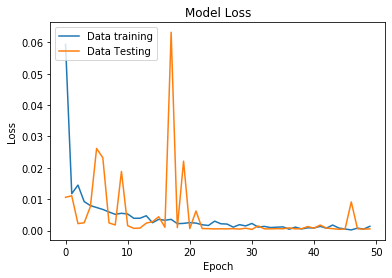

In [18]:
plt.plot(acc_training.history['loss'])
plt.plot(acc_training.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Data training', 'Data Testing'], loc='upper left')
plt.show()

# Confusion Matrix
    Confusion Matrix adalah sebuah tabel yang berisi 2 jenis nilai yaitu Nilai prediksi dan Nilai Dataset(nilai yang benar). Nilai tersebut dipecah menjadi 4 dan akan dibandingkan untuk mendapatkan informasi tentang performa model learning.
    
Misal : `0` ( positive ) dan `1` ( negative ).
    1. True Positive = Mesin memprediksi positive dan benar
    2. True Negative = Mesin memprediksi negative dan benar
    3. False Positive = Mesin memprediksi Positive dan padahal negative 
    4. False Negative = Mesin memprediksi negative dan padahal positive
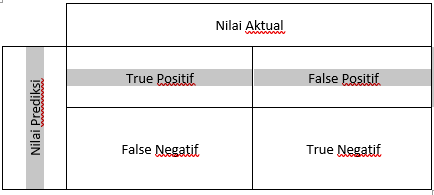
Dibawah ini adalah Hasil Confusion Matrix Model ANN.


In [19]:
prediction = model.predict_classes(x_test)
cm = confusion_matrix(y_test, prediction)
tp = cm[0,0]
tn = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]

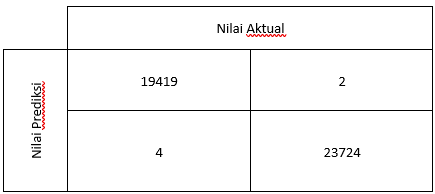

In [20]:
print ("Confussion matriks:\n",cm)

Confussion matriks:
 [[19420     1]
 [    3 23725]]


# Evaluasi Model dengan Confusion Matrix

Pada Confusion matrik ada banyak penilaian yang bisa diambil untuk mengukur performa dari model learning. Namun yang sering dipakai adalah :

1. `Akurasi` = Perbandingan Seberapa banyak model mengklasifikasi kelas yang benar dengan total kelas yang ada.

        Akurasi = (TP+TN)/(TP+TN+FP+FN)

2. `Recall` = Seberapa akurat mesin untuk mengklasifikasi kelas yang `positif`.

        Recall = TP/(TP+FN)

3. `Presisi` = Perbandingan prediksi kelas yang `positif yang benar` dengan semua prediksi kelas `positif`.

        Presisi = TP/(TP+FP)
        
4. `F1` = Nilai rata-rata dari Recall dan Presisi 
        
        F1 = (2*Presisi*recall) / (presisi+recall)


In [21]:
precision = tp / ( tp + fp)
recall = tp/(tp+fn)
f1=(2*precision*recall)/ (precision+recall)
akurasi = (tp+tn)/(tp+tn+fp+fn)
Sensitivity = tp/(tp + fn)

In [23]:
print ("precesion : ",precision)
print("recall : ",recall)
print ("F1 : ",f1)
print("sensitivity : ",Sensitivity )
print("akurasi : ",akurasi)

precesion :  0.9999485093455538
recall :  0.9998455439427483
F1 :  0.9998970239934095
sensitivity :  0.9998455439427483
akurasi :  0.999907297967508
